# Inferência B - Atividade 1 - 
#### João Vitor da S. Arend - 00577787

**Teorema** 

Seja $X_1,...,X_n$ v.a. e i.i.d. com $X \sim \mathcal{N}(\mu, \sigma^2)$, então: 

A.  $\bar{X}$ e $S²$ são independentes;

B.  $\frac{n-1}{\sigma^2}S² \sim \chi^2_{n-1}$;

C.  $\frac{(\bar{X} - \mu)}{\frac{S}{\sqrt{n}}} = \sqrt{n}\frac{(\bar{X} - \mu)}{S} \sim t_{n-1}$


Considerando $\mu = 5$, $\sigma = 47$, $n = 15$: 

1. Gere dados de uma distribuição normal; 

2. Calcule $\bar{X}$ e $S²$;

3. Obtenha $\frac{n-1}{\sigma^2}S²$;

4. Obtenha $\sqrt{n}\frac{(\bar{X} - \mu)}{S}$

5. Repita os passos anteriores 1000 vezes; 

6. Verifique graficamente o item A;

7. Compare graficamente as distribuições empíricas (3 e 4) e teóricas (B e C).


In [2]:
set.seed(00577787)
library(ggplot2)

mu    = 5
sigma = 47
n     = 15

bar_x   = c()
s2      = c()
chi_emp = c()
t_emp   = c()

for (i in 1:1000){
  x          <- rnorm(n, mean = mu, sd = sigma)
  bar_x[i]   <- mean(x)
  s2[i]      <- var(x)
  chi_emp[i] <- ((n - 1) / (sigma^2)) * s2[i]
  t_emp[i]   <- sqrt(n) * ((bar_x[i] - mu) / sqrt(s2[i]))
}

ans <- data.frame(bar_x, s2, chi_emp, t_emp)

Verificando a indenpendência entre $\bar{X}$ e $S²$ graficamente:

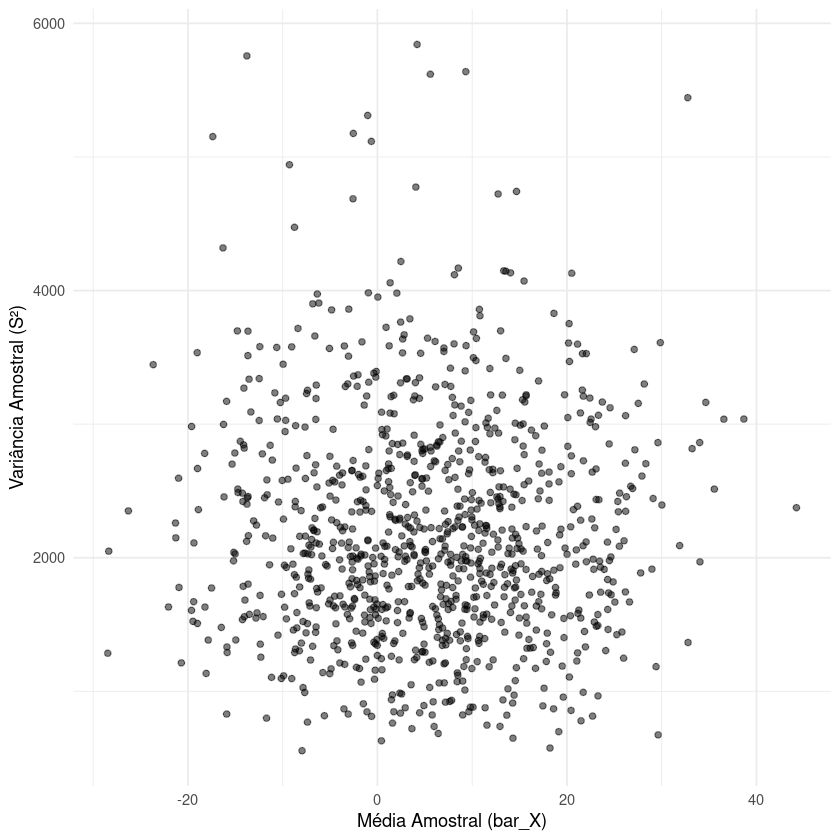

In [3]:
ggplot(ans, aes(x = bar_x, y = s2)) +
  geom_point(alpha = 0.5) +
  labs(x = "Média Amostral (bar_X)",
       y = "Variância Amostral (S²)") +
  theme_minimal()

**Empírico x Teórico:**

$\frac{n-1}{\sigma^2}S² \sim \chi^2_{n-1}$

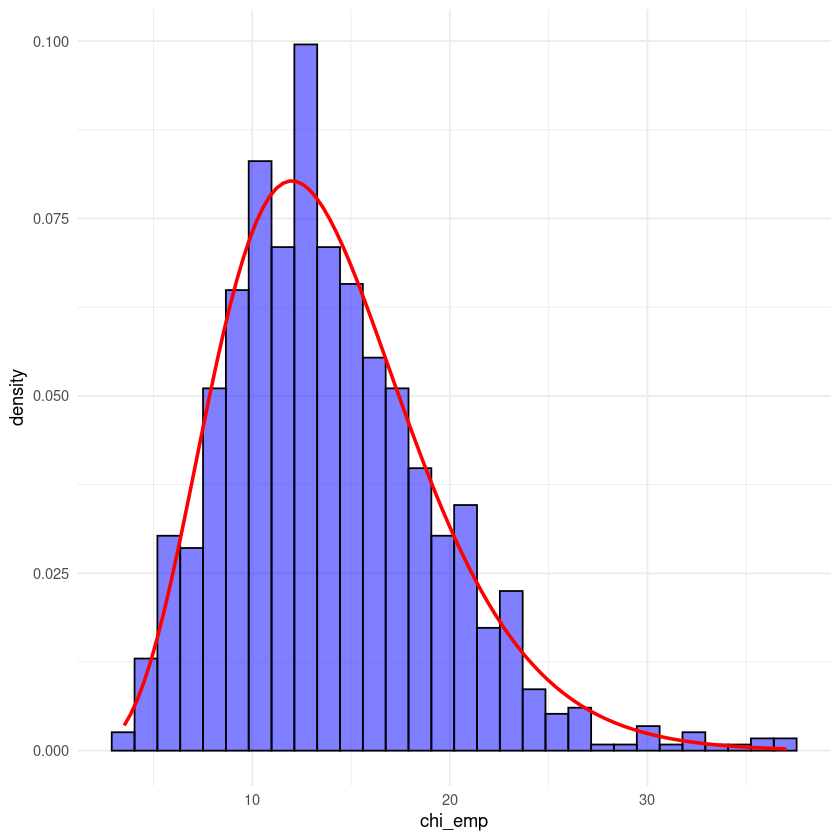

In [6]:
ggplot(ans, aes(x = chi_emp)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "blue", color = "black", alpha = 0.5) +
  stat_function(fun = dchisq, args = list(df = n - 1), color = "red", linewidth = 1) +
  theme_minimal()

$\sqrt{n}\frac{(\bar{X} - \mu)}{S} \sim t_{n-1}$

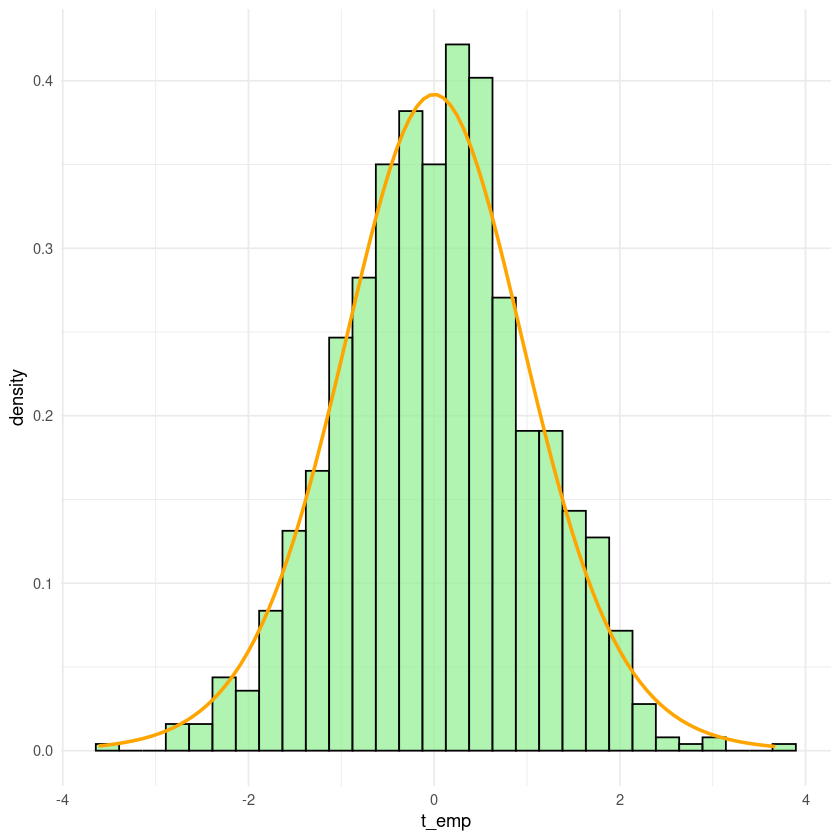

In [5]:
ggplot(ans, aes(x = t_emp)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightgreen", color = "black", alpha = 0.7) +
  stat_function(fun = dt, args = list(df = n - 1), color = "orange", size = 1) +
  theme_minimal()
